## Convolution Neural Network

- Identify fashion article name using images

###### importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
%matplotlib inline

In [5]:
df = keras.datasets.fashion_mnist
(X_train_full, y_train_full),(X_test, y_test) = df.load_data()

In [6]:
class_names = ['T-shirt/top', 'Trowser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

###### Data Reshape

- By default CNN needs 3 dimensional data, so we are adding one dimension into our grayscale images, which is for Channels

In [8]:
X_train_full = X_train_full.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

###### Data Normalization

In [9]:
X_train_n = X_train_full / 255.
X_test_n = X_test / 255.

###### Splitting the Data into train/validation/test datasets

In [10]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

###### Creating Model Architecture

In [11]:
np.random.seed(50)
tf.random.set_seed(50)

###### Model Sturcture

In [13]:
model = keras.models.Sequential()

# convolution layer
model.add(keras.layers.Conv2D(filters = 32, kernel_size = (3,3), strides = 1, padding = 'valid', activation = 'relu', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D((2,2)))

# converting 3d matrix to 2d using flatten layer
model.add(keras.layers.Flatten())

# Deep Dense layers
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 300)               1622700   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
______________________________________________

###### Compiling Model

In [15]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [16]:
model_history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_valid, y_valid))

Epoch 1/20
860/860 [==============================] - 38s 41ms/step - loss: 1.2951 - accuracy: 0.5880 - val_loss: 0.6049 - val_accuracy: 0.7730
Epoch 2/20
860/860 [==============================] - 35s 41ms/step - loss: 0.5516 - accuracy: 0.7990 - val_loss: 0.5242 - val_accuracy: 0.8054
Epoch 3/20
860/860 [==============================] - 36s 41ms/step - loss: 0.4773 - accuracy: 0.8283 - val_loss: 0.4865 - val_accuracy: 0.8172
Epoch 4/20
860/860 [==============================] - 35s 41ms/step - loss: 0.4388 - accuracy: 0.8420 - val_loss: 0.5205 - val_accuracy: 0.8054
Epoch 5/20
860/860 [==============================] - 35s 41ms/step - loss: 0.4118 - accuracy: 0.8513 - val_loss: 0.4219 - val_accuracy: 0.8508
Epoch 6/20
860/860 [==============================] - 35s 41ms/step - loss: 0.3929 - accuracy: 0.8595 - val_loss: 0.3801 - val_accuracy: 0.8632
Epoch 7/20
860/860 [==============================] - 35s 41ms/step - loss: 0.3675 - accuracy: 0.8681 - val_loss: 0.3607 - val_accuracy:

###### Creating Dataframe

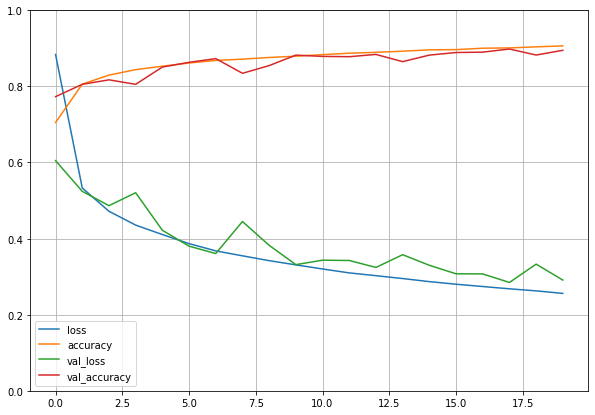

In [17]:
pd.DataFrame(model_history.history).plot(figsize = (10, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [18]:
ev = model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.3096 - accuracy: 0.8889


In [19]:
ev

[0.3095684349536896, 0.8888999819755554]

In [20]:
X_new = X_test[:3]

In [21]:
y_pred = model.predict_classes(X_new)

D:\Programming\Python\Anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [22]:
y_pred

array([9, 2, 1], dtype=int64)

In [23]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

AxesImage(54,36;334.8x217.44)


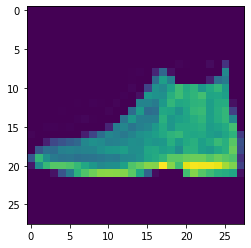

In [24]:
print(plt.imshow(X_test[0].reshape((28, 28))))

### Training Model without Pooling Layer

In [25]:
model1 = keras.models.Sequential()

# convolution layer
model1.add(keras.layers.Conv2D(filters = 32, kernel_size = (3,3), strides = 1, padding = 'valid', activation = 'relu', input_shape=(28, 28, 1)))


# converting 3d matrix to 2d using flatten layer
model1.add(keras.layers.Flatten())

# Deep Dense layers
model1.add(keras.layers.Dense(300, activation='relu'))
model1.add(keras.layers.Dense(100, activation='relu'))
model1.add(keras.layers.Dense(10, activation='softmax'))

In [26]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
flatten_1 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               6489900   
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 6,521,330
Trainable params: 6,521,330
Non-trainable params: 0
_________________________________________________________________


In [27]:
model1.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [28]:
model1_history = model1.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_valid, y_valid))

Epoch 1/20
860/860 [==============================] - 75s 86ms/step - loss: 1.0367 - accuracy: 0.6747 - val_loss: 0.5589 - val_accuracy: 0.7898
Epoch 2/20
860/860 [==============================] - 67s 78ms/step - loss: 0.5042 - accuracy: 0.8161 - val_loss: 0.5182 - val_accuracy: 0.8026
Epoch 3/20
860/860 [==============================] - 65s 75ms/step - loss: 0.4425 - accuracy: 0.8416 - val_loss: 0.4310 - val_accuracy: 0.8450
Epoch 4/20
860/860 [==============================] - 65s 75ms/step - loss: 0.4095 - accuracy: 0.8527 - val_loss: 0.4840 - val_accuracy: 0.8250
Epoch 5/20
860/860 [==============================] - 65s 75ms/step - loss: 0.3872 - accuracy: 0.8593 - val_loss: 0.4065 - val_accuracy: 0.8484
Epoch 6/20
860/860 [==============================] - 65s 76ms/step - loss: 0.3717 - accuracy: 0.8650 - val_loss: 0.3734 - val_accuracy: 0.8606
Epoch 7/20
860/860 [==============================] - 64s 75ms/step - loss: 0.3513 - accuracy: 0.8716 - val_loss: 0.3866 - val_accuracy:

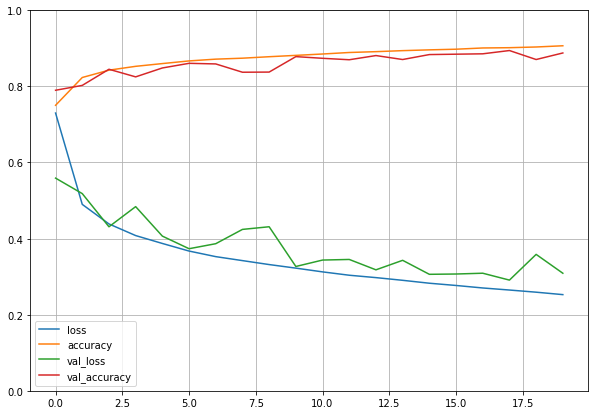

In [29]:
pd.DataFrame(model1_history.history).plot(figsize = (10, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()